In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymysql
%matplotlib inline

SDSS IV MaNGA -- Metallicity and ionisation parameter in local star-forming galaxies from Bayesian fitting to photoionisation models 
Mingozzi, M., Belfiore, F., Cresci, G., Bundy, K., Bershady, M., Bizyaev, D., Blanc, G., Boquien, M., Drory, N., Fu, H., Maiolino, R., Riffel, R., Schaefer, A., Storchi-Bergmann, T., Telles, E., Tremonti, C., Zakamska, N., & Zhang, K.
2020, arXiv e-prints, , arXiv:2002.05744

ABSTRACT: We measured gas-phase metallicity, ionisation parameter and dust extinction for 1795 representative local star-forming galaxies using integral field spectroscopy from the SDSS-IV MaNGA survey. We self-consistently derive these quantities by comparing observed line fluxes with photoionisation models using a Bayesian framework. We also present the first comprehensive study of the [SIII]$\lambda\lambda$9069,9532 nebular lines, which have long been predicted to be ideal tracers of the ionisation parameter. Unfortunately, we find that current photoionisation models substantially over-predict [SIII] lines intensity, while broadly reproducing other observed optical line ratios. We discuss how to nonetheless make use of the information provided by [SIII] lines by setting a prior on the ionisation parameter. Following this approach, we derive spatially-resolved maps and radial profiles of metallicity and ionisation parameter. The metallicity radial profiles are comparable with previous works, with metallicity declining toward the outer parts and a flattening in the central regions, in agreement with infall models of galaxy formation, that predict that spiral discs build up through accretion of material, which leads to an inside-out growth. On the other hand, ionisation parameter radial profiles are flat for low-mass galaxies, while their slope becomes positive as galaxy mass increases. However, the ionisation parameter maps we obtain are clumpy, especially for low-mass galaxies. Ionisation parameter is tightly correlated with the H$\alpha$ equivalent width [EW(H$\alpha$)], following a nearly universal relation, which we attribute to the change of the spectral shape of ionising sources due to ageing of HII regions. We derive a positive correlation between ionisation parameter and metallicity at fixed EW(H$\alpha$), in disagreement with previous theoretical works expecting an anti-correlation.

ADS URL : https://ui.adsabs.harvard.edu/abs/2020arXiv200205744M


In [15]:
sel="""select
    oxygen, dens, logU_mean, 
    NE_5_342603A as ne5 , BLND_472000A as ne4, NE_3_386876A + NE_3_396747A as ne3, 
    AR_5_700583A as ar5, AR_4_474012A as ar4,
    S__3_906862A + S__3_953062A as s3, S__2_671644A + S__2_673082A as s2,
    O__3_500684A as o3, BLND_372700A  as o2, BLND_436300A as o3_63,
    HE_1_587564A as he1, HE_2_468564A as he2, H__1_486133A as hb
    FROM tab_17
    WHERE tab_17.ref = 'BOND' """

db = pymysql.connect(host=os.environ['MdB_HOST'], 
                     user=os.environ['MdB_USER'], 
                     passwd=os.environ['MdB_PASSWD'], 
                     db=os.environ['MdB_DB_17'])    
res = pd.read_sql(sel, con=db)
db.close()

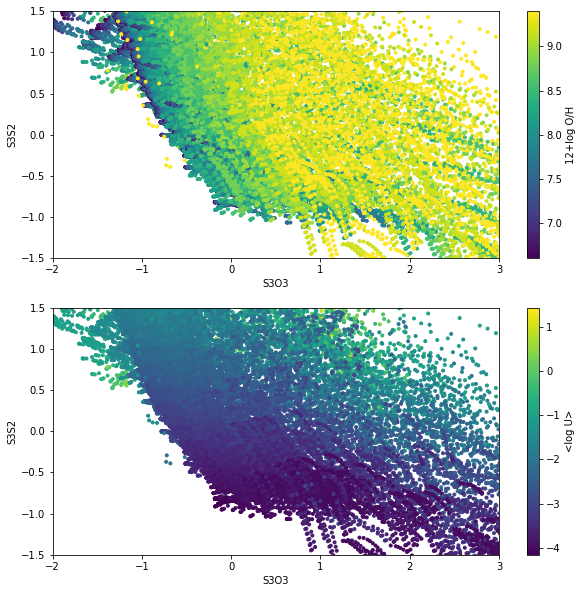

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sc1 = ax1.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=12+res['oxygen'])
ax1.set_xlim((-2,3))
ax1.set_ylim((-1.5, 1.5))
ax1.set_xlabel('S3O3')
ax1.set_ylabel('S3S2')
cb1 = f.colorbar(sc1, ax=ax1)
cb1.set_label('12+log O/H')

sc2 = ax2.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=res['logU_mean'])
ax2.set_xlim((-2,3))
ax2.set_ylim((-1.5, 1.5))
ax2.set_xlabel('S3O3')
ax2.set_ylabel('S3S2')
cb2 = f.colorbar(sc2, ax=ax2)
cb2.set_label('<log U>');

In [18]:
sel="""select
    oxygen, dens, logU_mean, 
    NE_5_342603A as ne5 , BLND_472000A as ne4, NE_3_386876A + NE_3_396747A as ne3, 
    AR_5_700583A as ar5, AR_4_474012A as ar4,
    S__3_906862A + S__3_953062A as s3, S__2_671644A + S__2_673082A as s2,
    O__3_500684A as o3, BLND_372700A  as o2, BLND_436300A as o3_63,
    HE_1_587564A as he1, HE_2_468564A as he2, H__1_486133A as hb
    FROM tab_17
    WHERE tab_17.ref = 'CALIFA' """

db = pymysql.connect(host="localhost", 
                     port=3330,
                     user=os.environ['MdB_USER'], 
                     passwd=os.environ['MdB_PASSWD'], 
                     db=os.environ['MdB_DB_17'])    
res = pd.read_sql(sel, con=db)
db.close()

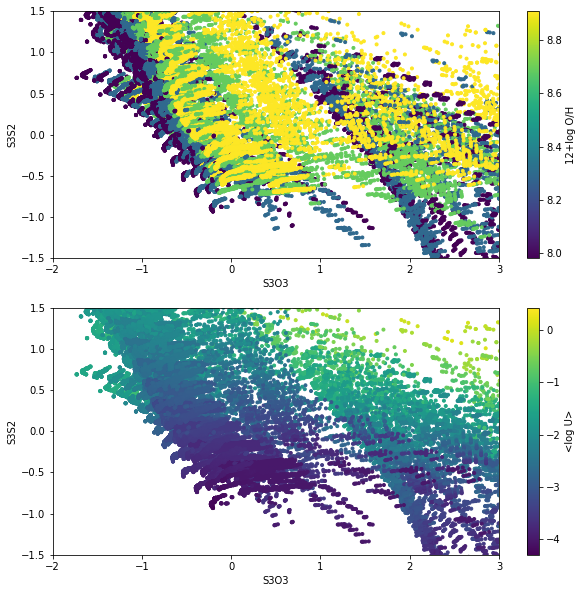

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sc1 = ax1.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=12+res['oxygen'])
ax1.set_xlim((-2,3))
ax1.set_ylim((-1.5, 1.5))
ax1.set_xlabel('S3O3')
ax1.set_ylabel('S3S2')
cb1 = f.colorbar(sc1, ax=ax1)
cb1.set_label('12+log O/H')

sc2 = ax2.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=res['logU_mean'])
ax2.set_xlim((-2,3))
ax2.set_ylim((-1.5, 1.5))
ax2.set_xlabel('S3O3')
ax2.set_ylabel('S3S2')
cb2 = f.colorbar(sc2, ax=ax2)
cb2.set_label('<log U>');

In [20]:
sel="""select
    oxygen, dens, logU_mean, 
    NE_5_342603A as ne5 , BLND_472000A as ne4, NE_3_386876A + NE_3_396747A as ne3, 
    AR_5_700583A as ar5, AR_4_474012A as ar4,
    S__3_906862A + S__3_953062A as s3, S__2_671644A + S__2_673082A as s2,
    O__3_500684A as o3, BLND_372700A  as o2, BLND_436300A as o3_63,
    HE_1_587564A as he1, HE_2_468564A as he2, H__1_486133A as hb
    FROM tab_17
    WHERE tab_17.ref = 'PNe_2020' AND com6=1 """

db = pymysql.connect(host="localhost", 
                     port=3330,
                     user=os.environ['MdB_USER'], 
                     passwd=os.environ['MdB_PASSWD'], 
                     db=os.environ['MdB_DB_17'])    
res = pd.read_sql(sel, con=db)
db.close()

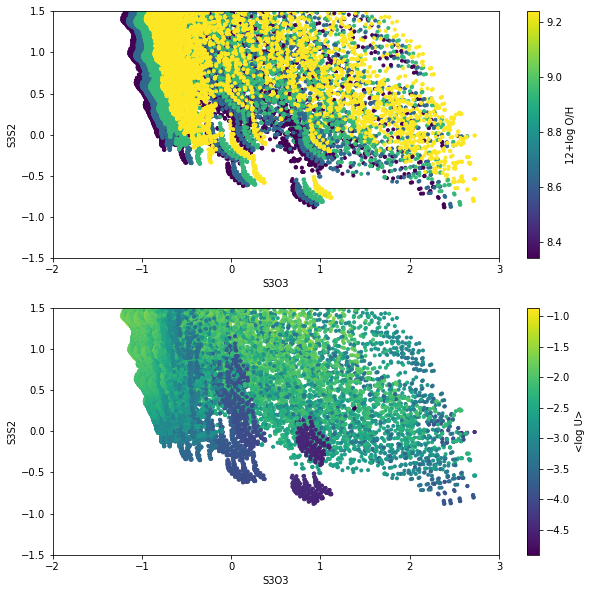

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sc1 = ax1.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=12+res['oxygen'])
ax1.set_xlim((-2,3))
ax1.set_ylim((-1.5, 1.5))
ax1.set_xlabel('S3O3')
ax1.set_ylabel('S3S2')
cb1 = f.colorbar(sc1, ax=ax1)
cb1.set_label('12+log O/H')

sc2 = ax2.scatter(np.log10(res['s3']/res['o3']), np.log10(res['s3']/res['s2']), marker='.', alpha=1, c=res['logU_mean'])
ax2.set_xlim((-2,3))
ax2.set_ylim((-1.5, 1.5))
ax2.set_xlabel('S3O3')
ax2.set_ylabel('S3S2')
cb2 = f.colorbar(sc2, ax=ax2)
cb2.set_label('<log U>');